In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
path = "https://raw.githubusercontent.com/Kamil128/Learning_repo/main/ML_Classification/data/spam.csv"
df = pd.read_csv(path, encoding='latin-1')[['v1', 'v2']]

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns = ['label', 'message']
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
X = df['message']
y = df['label']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', 
                             max_features=3000,
                             lowercase=True,
                             min_df=0.001,
                             max_df=0.99
                             )

In [9]:
X_tr = vectorizer.fit_transform(X_train)

In [10]:
X_tr = X_tr.toarray()
X_tr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
X_tr.shape

(4457, 1352)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

param={'stop_words': 'english', 
      'max_features': 3000,
      'lowercase': True,
      'min_df': 0.001,
      'max_df': 0.99}

spam_filter = Pipeline([
    ('vectorizer', CountVectorizer(**param)), 
    ('classifier', MultinomialNB())                    
])

In [13]:
spam_filter.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.99, max_features=3000, min_df=0.001,
                                 stop_words='english')),
                ('classifier', MultinomialNB())])

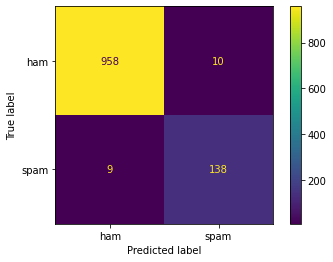

In [14]:
from plot_utils import MetricsUtils

metrics = MetricsUtils(x=X_test, y=y_test, estimator=spam_filter)
metrics.show_confusion_matrix()

In [15]:
spam_filter.predict_proba(X_test)

array([[9.99995467e-01, 4.53288847e-06],
       [9.99998462e-01, 1.53766370e-06],
       [9.99730827e-01, 2.69173136e-04],
       ...,
       [1.00000000e+00, 1.62202495e-11],
       [9.99994021e-01, 5.97879195e-06],
       [9.99291411e-01, 7.08588626e-04]])

In [17]:
spam_filter['classifier'].class_log_prior_

array([-0.14458621, -2.00530152])